<a href="https://colab.research.google.com/github/MaxVieiraSantiago/Machine-Learning-Algorithms/blob/master/Polinomial%20Regression/Regress%C3%A3o_Polinomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Regressão Polinomial**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
arquivo = '/content/drive/MyDrive/Udemy/comissao.xlsx'
dados = pd.read_excel(arquivo)

## **Análise Inicial**

In [ ]:
dados.head()

,quantidade,comissao
0,1,728
1,2,762
2,3,802
3,4,848
4,5,900


In [ ]:
dados.shape

(50, 2)

In [ ]:
dados.dtypes

quantidade    int64
comissao      int64
dtype: object

In [ ]:
dados = dados.astype( {"comissao" : float} )
dados.dtypes

quantidade      int64
comissao      float64
dtype: object

### **Valores Missing (Nan)**

In [ ]:
dados.isnull().sum()

quantidade    0
comissao      0
dtype: int64

### **Gráfico para Análise Inicial**

In [ ]:
import matplotlib.pyplot as plt

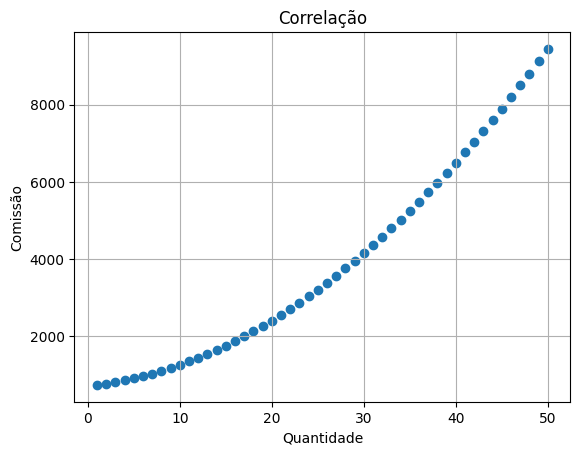

In [ ]:
plt.scatter(dados['quantidade'], dados['comissao'])
plt.title('Correlação')
plt.xlabel('Quantidade')
plt.ylabel('Comissão')
plt.grid(True)
plt.show()

#### **Normalidade**

In [ ]:
import scipy.stats as stats

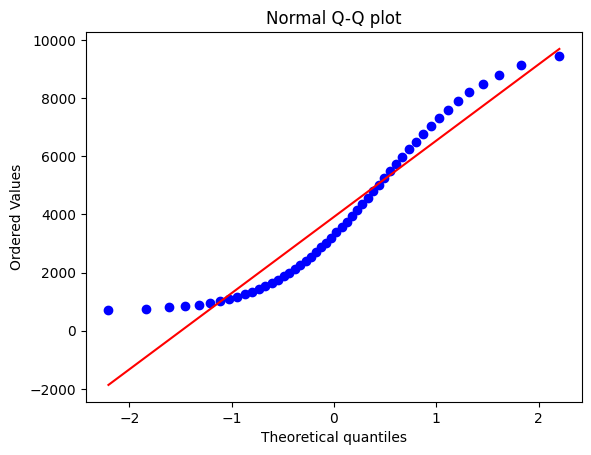

In [ ]:
stats.probplot(dados['comissao'], dist='norm', plot=plt)
plt.title('Normal Q-Q plot')
plt.show()

#### **Teste Shapiro-Wilk**

Ho - Distribuiçã Normal: p > 0.05

Ha - Distribuição NÃO Normal: p <= 0.05

In [ ]:
estatistica, p = stats.shapiro(dados['comissao'])
print('Estatística do teste: {:.2f}%'.format(estatistica * 100))
print('p-value: {}'.format(p))


Estatística do teste: 91.25%
p-value: 0.0012719858204945922


### **Correlação Linear**

Pearson (Distribuição Normal) - **NÃO PODEMOS NESTE CASO**

Spearman (Distribuição Não Normal )

Kendall (Distribuição Não Normal com Quantidade Pequena de Amostras)

Ho - Não há Correlação Linear: p > 0.05

Ha - Há Correlação Linear: p <= 0.05

In [ ]:
# Spearman
coef, p = stats.spearmanr(dados['quantidade'], dados['comissao'])
print("Coeficiente de Correlação: {:.2f}%".format(coef * 100))
print("p-value: {}".format(p))

Coeficiente de Correlação: 100.00%
p-value: 0.0


## **Modelo - Regressão Linear**

In [ ]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

In [ ]:
# Criação do Modelo
regressao = smf.ols('comissao ~ quantidade', data = dados).fit()

In [ ]:
print(regressao.summary())

                            OLS Regression Results                            
Dep. Variable:               comissao   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     1016.
Date:                Wed, 28 Feb 2024   Prob (F-statistic):           5.98e-34
Time:                        13:32:14   Log-Likelihood:                -387.21
No. Observations:                  50   AIC:                             778.4
Df Residuals:                      48   BIC:                             782.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -626.0000    163.662     -3.825      0.0

Estatística t:

Ho - coeficiente igual a zero: p > 0.05 ( coeficiente não validado )

Ha - coeficiente diferente de zero: p <= 0.05 ( coeficiente validado )

**Equação: -626.0000 + ( 178.0000 * quantidade )**

**R^2 Ajustado = 0,954**


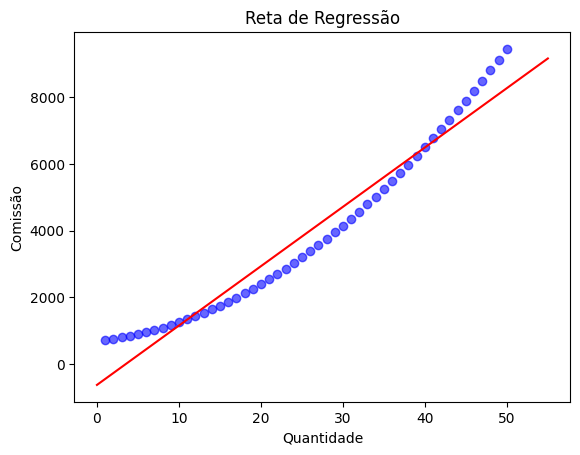

In [ ]:
plt.scatter(x=dados['quantidade'], y=dados['comissao'], color='blue', alpha=0.6)
X_plot = np.linspace(0, 55)
plt.plot( X_plot, regressao.params[0] + regressao.params[1] * X_plot, color='r' )
plt.title("Reta de Regressão")
plt.xlabel('Quantidade')
plt.ylabel('Comissão')
plt.grid(False)
plt.show()

In [ ]:
regressao.params

Intercept    -626.0
quantidade    178.0
dtype: float64

# **Regressão POLINOMIAL com NumPy - Grau 2**

**y = b0 + (b1 * X) + (b2 * X^2)**

In [ ]:
modelo2 = np.poly1d(np.polyfit(dados['quantidade'], dados['comissao'], 2))

In [ ]:
# Previsão ( y_pred )
y2 = modelo2(dados['quantidade'])
y2

array([ 728.,  762.,  802.,  848.,  900.,  958., 1022., 1092., 1168.,
       1250., 1338., 1432., 1532., 1638., 1750., 1868., 1992., 2122.,
       2258., 2400., 2548., 2702., 2862., 3028., 3200., 3378., 3562.,
       3752., 3948., 4150., 4358., 4572., 4792., 5018., 5250., 5488.,
       5732., 5982., 6238., 6500., 6768., 7042., 7322., 7608., 7900.,
       8198., 8502., 8812., 9128., 9450.])

In [ ]:
# Começa do final para o início
# 700. -> intercepto
#  25. -> X^2
#   3. -> X
modelo2.coef

array([  3.,  25., 700.])

In [ ]:
print("Equação: COMISSÃO = {:.1f} + ({:.1f} * quantidade) + ({:.1f} * quantidade ^ 2)".format(modelo2.coef[2], modelo2.coef[1], modelo2.coef[0]))

Equação: COMISSÃO = 700.0 + (25.0 * quantidade) + (3.0 * quantidade)


Text(0, 0.5, 'Comissão')

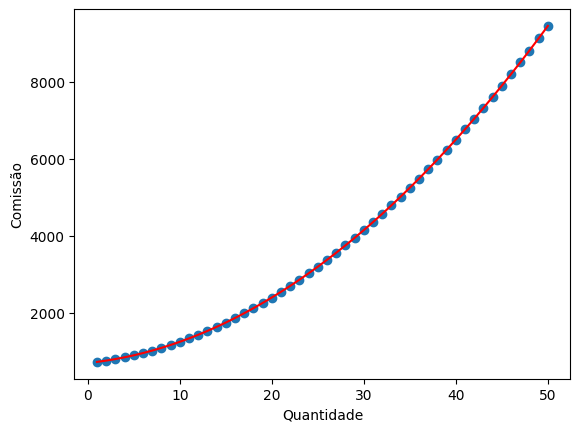

In [ ]:
plt.scatter(x=dados['quantidade'], y=dados['comissao'])
plt.plot(dados['quantidade'], y2, color='red')
plt.xlabel('Quantidade')
plt.ylabel('Comissão')

# **Regressão POLINOMIAL com NumPy - Grau 3**

In [ ]:
modelo3 = np.poly1d(np.polyfit(dados['quantidade'], dados['comissao'], 3))
modelo3

poly1d([3.78115434e-17, 3.00000000e+00, 2.50000000e+01, 7.00000000e+02])

In [ ]:
# Previsão ( y_pred )
y3 = modelo3(dados['quantidade'])
y3

array([ 728.,  762.,  802.,  848.,  900.,  958., 1022., 1092., 1168.,
       1250., 1338., 1432., 1532., 1638., 1750., 1868., 1992., 2122.,
       2258., 2400., 2548., 2702., 2862., 3028., 3200., 3378., 3562.,
       3752., 3948., 4150., 4358., 4572., 4792., 5018., 5250., 5488.,
       5732., 5982., 6238., 6500., 6768., 7042., 7322., 7608., 7900.,
       8198., 8502., 8812., 9128., 9450.])

In [ ]:
modelo3.coef

array([3.78115434e-17, 3.00000000e+00, 2.50000000e+01, 7.00000000e+02])

In [ ]:
print('Equação: COMISSÃO = {:.1f} + ({:.1f} * quantidade) + ({:.1f} * quantidade ^ 2) + ({:.1f} * quantidade ^ 3)'.format(modelo3.coef[3], modelo3.coef[2], modelo3.coef[1], modelo3.coef[0]))

Equação: COMISSÃO = 700.0 + (25.0 * quantidade) + (3.0 * quantidade ^ 2) + (0.0 * quantidade ^ 3)


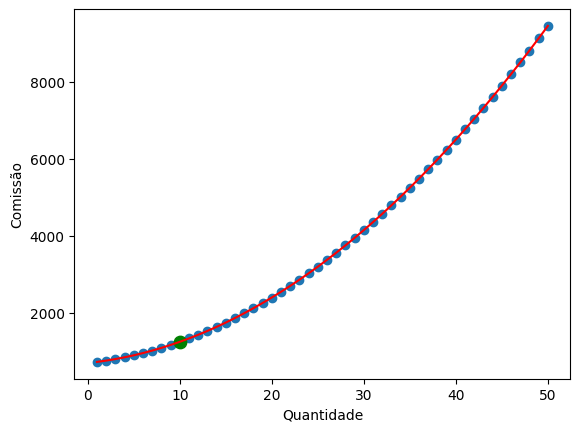

In [ ]:
plt.scatter(x=dados['quantidade'], y=dados['comissao'])
plt.plot(dados['quantidade'], y3, color='red')

# Inserindo um valor previsto pelo modelo
y_pred = 10
plt.scatter(x=y_pred, y=modelo3(y_pred), color='green', s=80)

plt.xlabel('Quantidade')
plt.ylabel('Comissão')
plt.show()

# **Reressão POLINOMIAL com SKLearn**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [ ]:
# Pré-Processamento
pre_process = PolynomialFeatures(degree=2)

In [ ]:
X = dados[['quantidade']]
y = dados['comissao']

In [ ]:
X

,quantidade
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [ ]:
y

0      728.0
1      762.0
2      802.0
3      848.0
4      900.0
5      958.0
6     1022.0
7     1092.0
8     1168.0
9     1250.0
10    1338.0
11    1432.0
12    1532.0
13    1638.0
14    1750.0
15    1868.0
16    1992.0
17    2122.0
18    2258.0
19    2400.0
20    2548.0
21    2702.0
22    2862.0
23    3028.0
24    3200.0
25    3378.0
26    3562.0
27    3752.0
28    3948.0
29    4150.0
30    4358.0
31    4572.0
32    4792.0
33    5018.0
34    5250.0
35    5488.0
36    5732.0
37    5982.0
38    6238.0
39    6500.0
40    6768.0
41    7042.0
42    7322.0
43    7608.0
44    7900.0
45    8198.0
46    8502.0
47    8812.0
48    9128.0
49    9450.0
Name: comissao, dtype: float64

In [ ]:
X_poly = pre_process.fit_transform(X)

modelo_sk = LinearRegression()
modelo_sk.fit(X_poly, y);

In [ ]:
y_pred = modelo_sk.predict(X_poly)

Text(0, 0.5, 'Comissao')

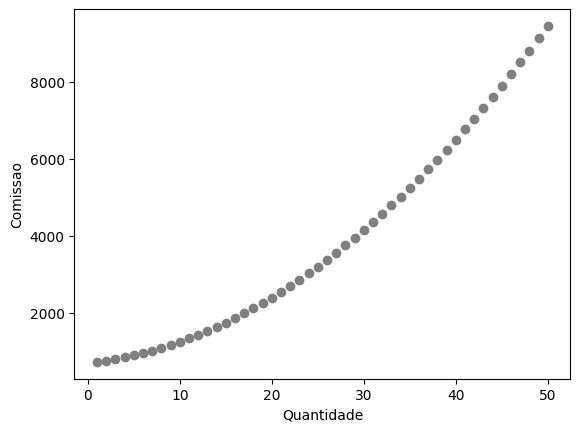

In [ ]:
plt.scatter(X, y, c='gray')
plt.xlabel('Quantidade')
plt.ylabel('Comissao')

In [ ]:
modelo_sk.coef_

array([ 0., 25.,  3.])

In [ ]:
modelo_sk.intercept_

700.0000000000059

In [ ]:
print('Equação: COMISSÃO = {:.1f} + ({:.1f} * quantidade) + ({:.1f} * quantidade ^ 2)'.format(modelo_sk.intercept_, modelo_sk.coef_[1], modelo_sk.coef_[2]))

Equação: COMISSÃO = 700.0 + (25.0 * quantidade) + (3.0 * quantidade ^ 2)


## **Previsão**

In [ ]:
quantidade = 60
previsao = modelo_sk.predict( pre_process.fit_transform([[quantidade]]))
print("Se vender {}, irá ganhar R$ {:.2f} de comissão.".format(quantidade, previsao[0]))

Se vender 60, irá ganhar R$ 13000.00 de comissão.


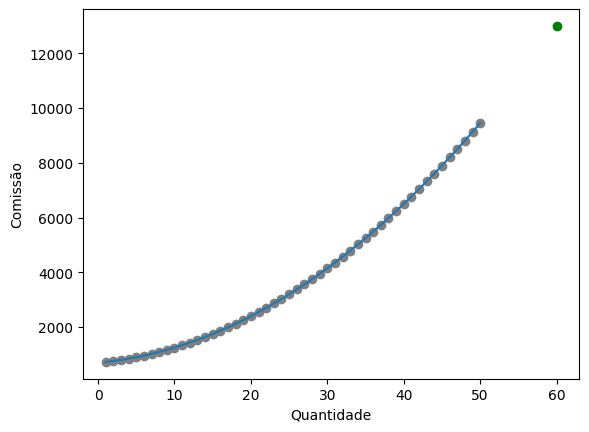

In [ ]:
plt.scatter(X, y, c='gray')
plt.xlabel('Quantidade')
plt.ylabel('Comissão')
plt.plot(X, y_pred)
plt.scatter( 60, previsao, c='green')

### **Avaliação do Modelo**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)

In [ ]:
print(f"Mean Absolute Error: {mae=}")
print(f"Mean Squared Error: {mse=}")

Mean Absolute Error: mae=2.3669599613640458e-12
Mean Squared Error: mse=7.633584584157331e-24
